Simple Linear Regression (Degree 1):
  Coefficients: intercept = 62423.42, slope = 5132.04
  MAE: 32307.07
  MSE: 1323388324.37
  RMSE: 36378.40
  R² Score: -0.0853

Polynomial Regression (Degree 2):
  Coefficients: [63564.79964713  5164.36619948 -1161.56594409]
  MAE: 32402.79
  MSE: 1320495021.43
  RMSE: 36338.62
  R² Score: -0.0830

--- Comparison Across Degrees ---
Degree 1: MSE = 1323388324.37, R² = -0.0853
Degree 2: MSE = 1320495021.43, R² = -0.0830
Degree 3: MSE = 1307661412.56, R² = -0.0724
Degree 4: MSE = 1321977434.82, R² = -0.0842
Degree 5: MSE = 1341739461.02, R² = -0.1004

Best Degree: 3 (R² = -0.0724)


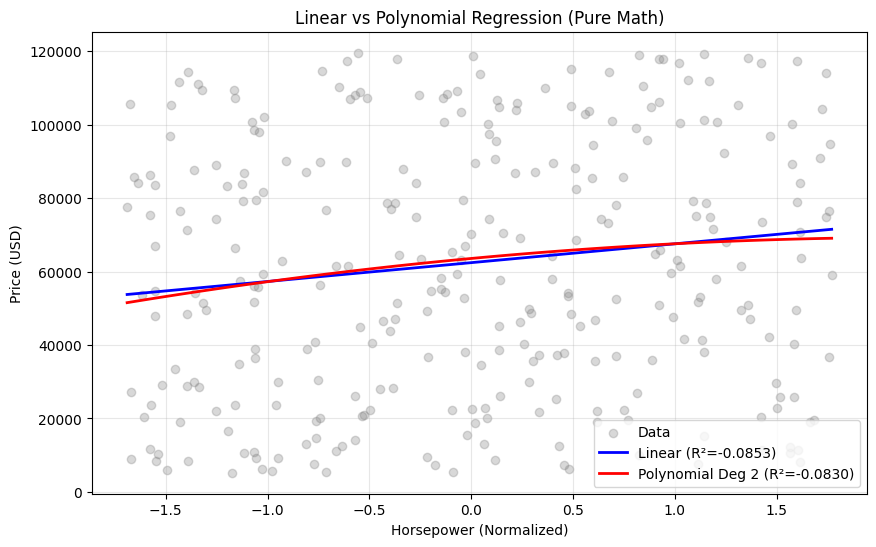


SUMMARY: Linear vs Polynomial Performance
Linear Regression:     R² = -0.0853, MSE = 1323388324.37
Polynomial (Degree 2): R² = -0.0830, MSE = 1320495021.43
Improvement: 0.24%


In [1]:
# part d: polynomial regression (using math - no sklearn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load cleaned dataset
df = pd.read_csv("cleaned_global_cars_dataset.csv")

# select feature and target
X = df["horsepower"].values
y = df["price_usd"].values

# normalize X to avoid numerical overflow
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std

# -------------------------
# helper functions (pure math)
# -------------------------

def create_polynomial_features(X, degree):
    """Create polynomial features [1, X, X^2, ..., X^degree]"""
    n = len(X)
    X_poly = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X ** d
    return X_poly

def polynomial_regression_fit(X, y, degree):
    """Fit using Normal Equation: θ = (X^T X)^(-1) X^T y"""
    X_poly = create_polynomial_features(X, degree)
    XtX = np.dot(X_poly.T, X_poly)
    Xty = np.dot(X_poly.T, y)
    XtX += np.eye(degree + 1) * 1e-8  # small regularization
    theta = np.linalg.solve(XtX, Xty)
    return theta

def polynomial_predict(X, theta):
    """Predict using polynomial coefficients"""
    degree = len(theta) - 1
    X_poly = create_polynomial_features(X, degree)
    return np.dot(X_poly, theta)

def calculate_metrics(y_true, y_pred):
    """Calculate MAE, MSE, RMSE, R²"""
    n = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred)) / n
    mse = np.sum((y_true - y_pred) ** 2) / n
    rmse = np.sqrt(mse)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return mae, mse, rmse, r2

# -------------------------
# train-test split (80-20) manually
# -------------------------
np.random.seed(42)
indices = np.random.permutation(len(X_normalized))
split_idx = int(0.8 * len(X_normalized))

X_train = X_normalized[indices[:split_idx]]
X_test = X_normalized[indices[split_idx:]]
y_train = y[indices[:split_idx]]
y_test = y[indices[split_idx:]]

# -------------------------
# 1. simple linear regression (degree = 1)
# -------------------------
theta_linear = polynomial_regression_fit(X_train, y_train, degree=1)
y_pred_linear = polynomial_predict(X_test, theta_linear)

mae_linear, mse_linear, rmse_linear, r2_linear = calculate_metrics(y_test, y_pred_linear)

print("Simple Linear Regression (Degree 1):")
print(f"  Coefficients: intercept = {theta_linear[0]:.2f}, slope = {theta_linear[1]:.2f}")
print(f"  MAE: {mae_linear:.2f}")
print(f"  MSE: {mse_linear:.2f}")
print(f"  RMSE: {rmse_linear:.2f}")
print(f"  R² Score: {r2_linear:.4f}")

# -------------------------
# 2. polynomial regression (degree = 2)
# -------------------------
theta_poly = polynomial_regression_fit(X_train, y_train, degree=2)
y_pred_poly = polynomial_predict(X_test, theta_poly)

mae_poly, mse_poly, rmse_poly, r2_poly = calculate_metrics(y_test, y_pred_poly)

print("\nPolynomial Regression (Degree 2):")
print(f"  Coefficients: {theta_poly}")
print(f"  MAE: {mae_poly:.2f}")
print(f"  MSE: {mse_poly:.2f}")
print(f"  RMSE: {rmse_poly:.2f}")
print(f"  R² Score: {r2_poly:.4f}")

# -------------------------
# 3. compare multiple degrees
# -------------------------
print("\n--- Comparison Across Degrees ---")
degrees = [1, 2, 3, 4, 5]
results = []

for degree in degrees:
    theta = polynomial_regression_fit(X_train, y_train, degree)
    y_pred = polynomial_predict(X_test, theta)
    mae, mse, rmse, r2 = calculate_metrics(y_test, y_pred)
    results.append({'degree': degree, 'theta': theta, 'mse': mse, 'r2': r2})
    print(f"Degree {degree}: MSE = {mse:.2f}, R² = {r2:.4f}")

best = max(results, key=lambda x: x['r2'])
print(f"\nBest Degree: {best['degree']} (R² = {best['r2']:.4f})")

# -------------------------
# visualization
# -------------------------
plt.figure(figsize=(10, 6))

# scatter plot of data
plt.scatter(X_normalized, y, alpha=0.3, label='Data', color='gray')

# plot curves
X_range = np.linspace(X_normalized.min(), X_normalized.max(), 100)

# linear line
y_linear_plot = polynomial_predict(X_range, theta_linear)
plt.plot(X_range, y_linear_plot, color='blue', linewidth=2, label=f'Linear (R²={r2_linear:.4f})')

# polynomial curve (degree 2)
y_poly_plot = polynomial_predict(X_range, theta_poly)
plt.plot(X_range, y_poly_plot, color='red', linewidth=2, label=f'Polynomial Deg 2 (R²={r2_poly:.4f})')

plt.xlabel("Horsepower (Normalized)")
plt.ylabel("Price (USD)")
plt.title("Linear vs Polynomial Regression (Pure Math)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# -------------------------
# summary comparison
# -------------------------
print("\n" + "=" * 50)
print("SUMMARY: Linear vs Polynomial Performance")
print("=" * 50)
print(f"Linear Regression:     R² = {r2_linear:.4f}, MSE = {mse_linear:.2f}")
print(f"Polynomial (Degree 2): R² = {r2_poly:.4f}, MSE = {mse_poly:.2f}")
improvement = (r2_poly - r2_linear) * 100
print(f"Improvement: {improvement:.2f}%")